<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [77]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# It allows matplotlib plots to be displayed directly in the notebook output, without the need to call plt.show() explicitly.
%matplotlib inline 

In [52]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [53]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


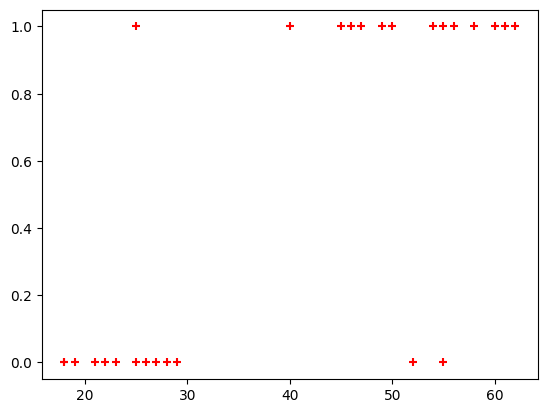

In [54]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [57]:
X_test

,age
20,21
2,47
9,61
19,18
16,25
21,26


In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [59]:
model.fit(X_train, y_train)

LogisticRegression()

In [60]:
X_test

,age
20,21
2,47
9,61
19,18
16,25
21,26


In [61]:
y_predicted = model.predict(X_test)

In [62]:
y_predicted

array([0, 1, 1, 0, 0, 0], dtype=int64)

##### The output array([0, 1, 1, 0, 0, 0], dtype=int64) shows the predicted class labels for the test data. Each element in the array corresponds to a sample in X_test, and the values represent the predicted class labels (in this case, binary classes 0 or 1).

In [63]:
model.predict_proba(X_test)

array([[0.96440974, 0.03559026],
       [0.30433248, 0.69566752],
       [0.04528018, 0.95471982],
       [0.97758913, 0.02241087],
       [0.9349079 , 0.0650921 ],
       [0.92455754, 0.07544246]])

##### This will return an array where each row corresponds to a sample in X_test, and each column contains the predicted probabilities for each class. The first column represents the probability of the sample belonging to class 0, and the second column represents the probability of the sample belonging to class 1.




In [64]:
model.score(X_test,y_test)

0.8333333333333334

##### This will output the accuracy of the model on the test data. The score() method compares the predicted labels with the true labels (y_test) and returns the proportion of correct predictions.

In [65]:
X_test

,age
20,21
2,47
9,61
19,18
16,25
21,26


**model.coef_ indicates value of m in y=m*x + b equation**

In [66]:
m=model.coef_
m

array([[0.15869981]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [67]:
b=model.intercept_
b

array([-6.63214023])

**Lets defined sigmoid function now and do the math with hand**

In [68]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [69]:
def prediction_function(age):
    z = m*age+b #mx+b
    y = sigmoid(z)
    return y

In [70]:
age = 35
prediction_function(age)

C:\Users\jisma\AppData\Local\Temp\ipykernel_16888\1239592357.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.2539516118685035

**0.25395 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [71]:
age = 43
prediction_function(age)

C:\Users\jisma\AppData\Local\Temp\ipykernel_16888\1239592357.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.5478411459880679

**0.5725 is more than 0.5 which means person with 43 will buy the insurance**

#### Predict using the model

In [72]:
model.predict([[35]])

C:\Users\jisma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [73]:
model.predict([[43]])

C:\Users\jisma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[3, 0],
       [1, 2]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

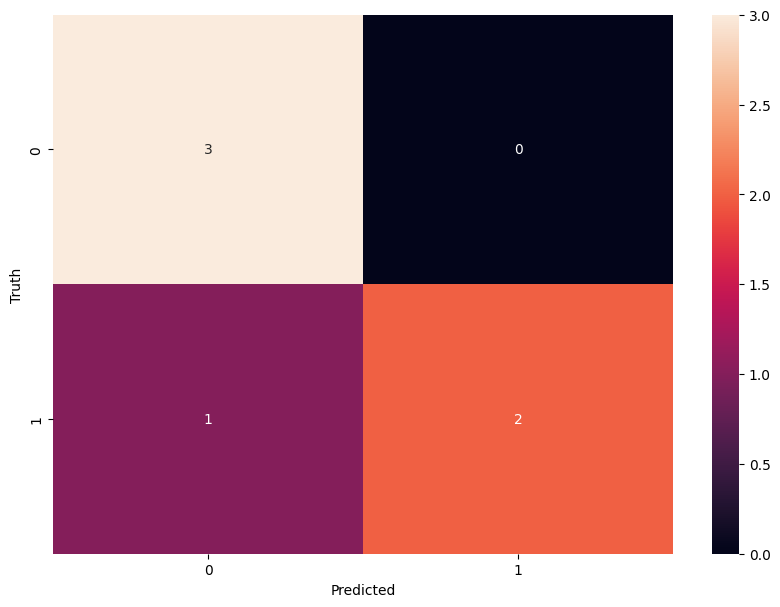

In [75]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [78]:
# True Positives (TP)
TP = cm[1, 1]

# True Negatives (TN)
TN = cm[0, 0]

# False Positives (FP)
FP = cm[0, 1]

# False Negatives (FN)
FN = cm[1, 0]

# Accuracy
accuracy = (TP + TN) / np.sum(cm)

# Precision
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# Specificity
specificity = TN / (TN + FP)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# False Positive Rate
false_positive_rate = FP / (FP + TN)

# False Negative Rate
false_negative_rate = FN / (FN + TP)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)


Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.6666666666666666
Specificity: 1.0
F1 Score: 0.8
False Positive Rate: 0.0
False Negative Rate: 0.3333333333333333


##### The accuracy of 0.83 indicates that the model is correct about 83.33% of the time.model.

Accuracy: 
Accuracy measures the overall correctness of the model, indicating the proportion of correctly classified instances (both true positives and true negatives) among all instances.
The accuracy value ranges from 0 to 1, where 1 represents perfect accuracy and 0 represents no accuracy.

##### The precision of 1.0 indicates that all positive predictions made by the model are correct.

Precision: 
Precision measures the proportion of correctly predicted positive cases out of all predicted positive cases (true positives and false positives).
A precision value of 1.0 means that all instances predicted as positive are indeed positive.

##### The recall of 0.67 indicates that the model correctly identifies approximately 66.67% of all actual positive instances.


Recall: 
Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive cases out of all actual positive cases (true positives and false negatives).
A recall value of 1.0 means that all actual positive cases are correctly predicted as positive.

##### The specificity of 1.0 indicates that the model correctly identifies all negative instances.


Specificity: 
Specificity, also known as true negative rate, measures the proportion of correctly predicted negative cases out of all actual negative cases (true negatives and false positives).
A specificity value of 1.0 means that all actual negative cases are correctly predicted as negative.

##### The F1 Score of 0.8 indicates a good balance between precision and recall.


F1 Score: 
F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
The F1 Score ranges from 0 to 1, where 1 represents perfect precision and recall, and 0 represents poor precision and recall.

##### The false positive rate of 0.0 indicates that there are no false positive predictions.


False Positive Rate: 
False Positive Rate measures the proportion of actual negative cases that are incorrectly predicted as positive out of all actual negative cases (false positives and true negatives).
A false positive rate of 0.0 indicates that there are no false positives.

##### The false negative rate of approximately 0.33 indicates that around 33.33% of actual positive cases are incorrectly predicted as negative by the model.

False Negative Rate:
False Negative Rate measures the proportion of actual positive cases that are incorrectly predicted as negative out of all actual positive cases (false negatives and true positives).
A false negative rate of 0.333 indicates that approximately 33.33% of actual positive cases are incorrectly predicted as negative.

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model